In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Read CSV file
MS2 = pd.read_csv("MS2.csv")

# Extract metadata
Meta = MS2.iloc[:, 10:12]

# Extract F20, F8, and CM columns
F20 = MS2.iloc[:, 0:3]
F8 = MS2.iloc[:, 3:6]
CM = MS2.iloc[:, 6:9]

# Calculate means
F20_means = F20.mean(axis=1)
F8_means = F8.mean(axis=1)
CM_means = CM.mean(axis=1)

# Combine means and metadata
MS2 = pd.concat([F20_means, F8_means, CM_means, Meta], axis=1)
MS2.columns = ['F20_means', 'F8_means', 'CM_means', 'Metadata']


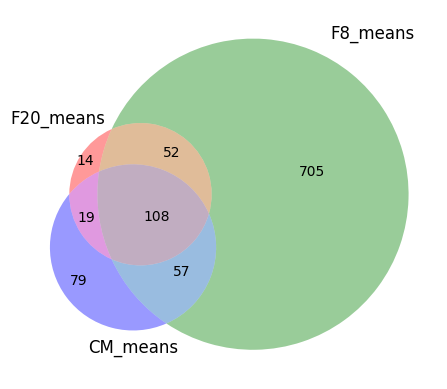

In [2]:
# Convert to sets
F20_set = set(MS2[MS2['F20_means'] > 0].index)
F8_set = set(MS2[MS2['F8_means'] > 0].index)
CM_set = set(MS2[MS2['CM_means'] > 0].index)

# Convert sets to lists
F20_list = list(F20_set)
F8_list = list(F8_set)
CM_list = list(CM_set)

# Create the Venn diagram
venn3(subsets=(len(F20_set - F8_set - CM_set), len(F8_set - F20_set - CM_set), len(F20_set & F8_set - CM_set), 
                len(CM_set - F20_set - F8_set), len(F20_set & CM_set - F8_set), len(F8_set & CM_set - F20_set), 
                len(F20_set & F8_set & CM_set)),
      set_labels=('F20_means', 'F8_means', 'CM_means'))
plt.show()


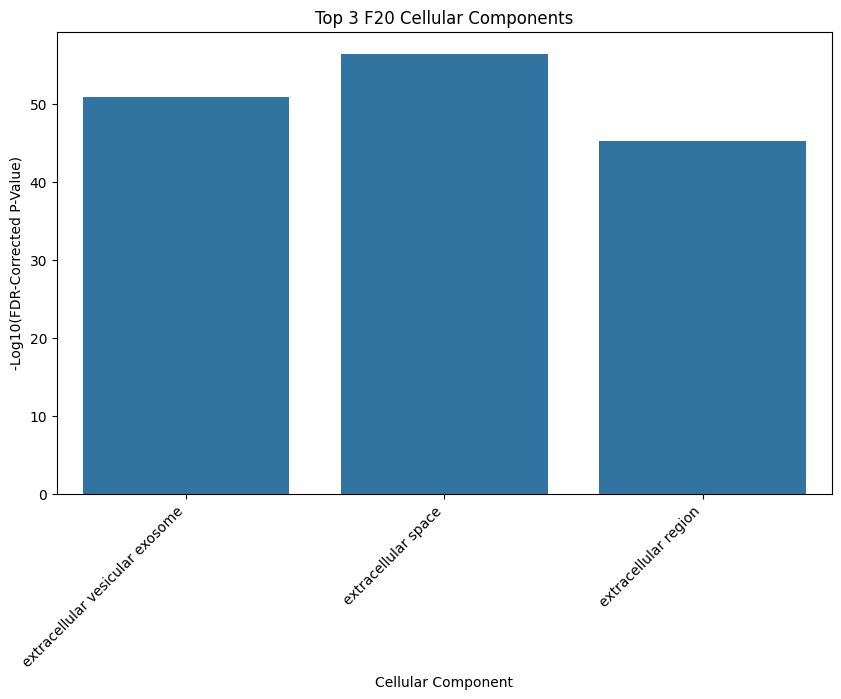

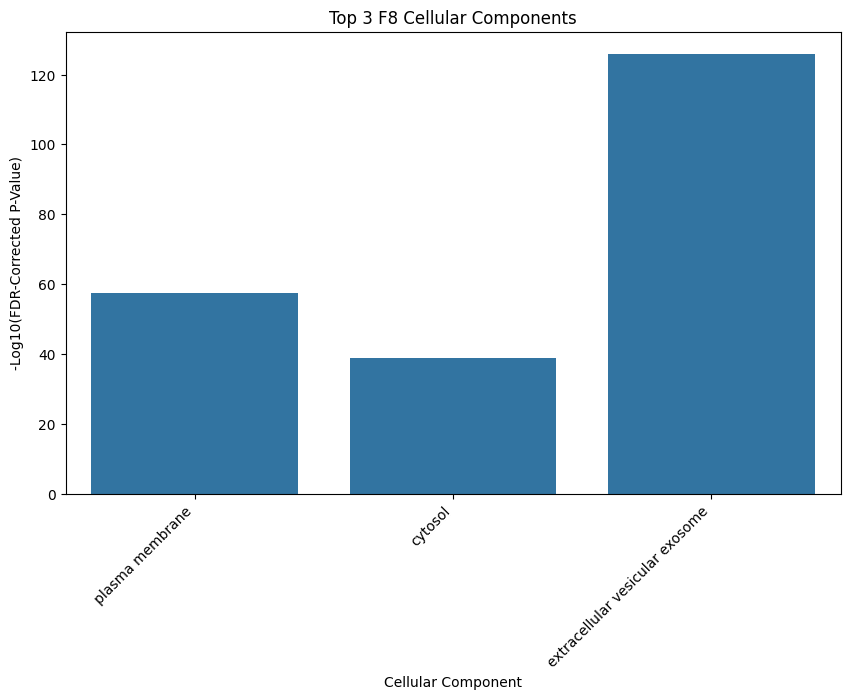

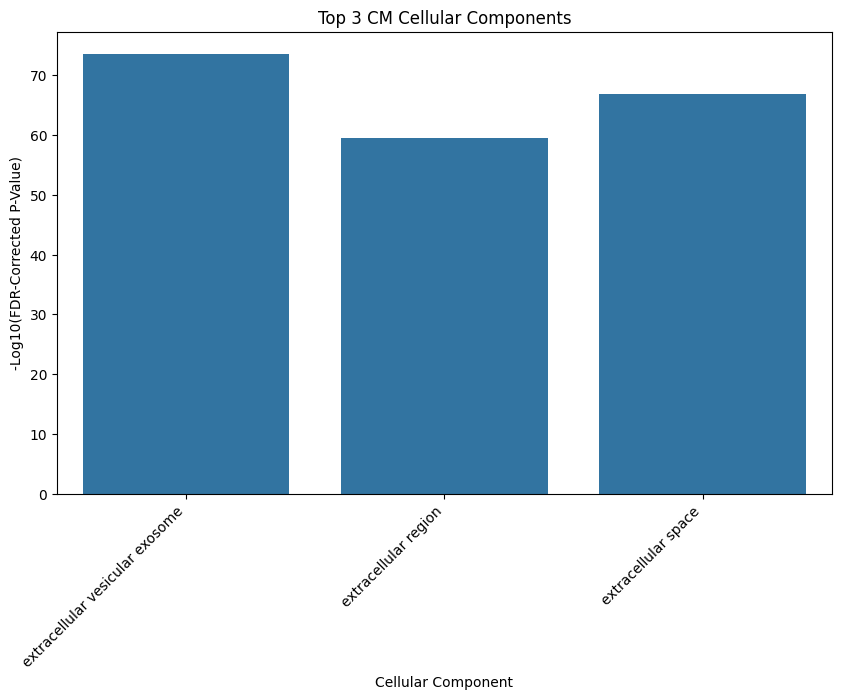

In [3]:
# Read Excel files
F20_Report = pd.read_excel("MS2_F20_report.xlsx")
F8_Report = pd.read_excel("MS2_F8_report.xlsx")
CM_Report = pd.read_excel("MS2_CM_report.xlsx")

# Create bar chart for F20
plt.figure(figsize=(10, 6))
sns.barplot(x='Cellular component', y='-Log10(FDR-Corrected P-Value)', data=F20_Report.iloc[1:4])
plt.title('Top 3 F20 Cellular Components')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cellular Component')
plt.ylabel('-Log10(FDR-Corrected P-Value)')
plt.show()

# Create bar chart for F8
plt.figure(figsize=(10, 6))
sns.barplot(x='Cellular component', y='-Log10(FDR-Corrected P-Value)', data=F8_Report.iloc[1:4])
plt.title('Top 3 F8 Cellular Components')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cellular Component')
plt.ylabel('-Log10(FDR-Corrected P-Value)')
plt.show()

# Create bar chart for CM
plt.figure(figsize=(10, 6))
sns.barplot(x='Cellular component', y='-Log10(FDR-Corrected P-Value)', data=CM_Report.iloc[1:4])
plt.title('Top 3 CM Cellular Components')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Cellular Component')
plt.ylabel('-Log10(FDR-Corrected P-Value)')
plt.show()


In [4]:
print(MS2.columns)

Index(['F20_means', 'F8_means', 'CM_means', 'Metadata'], dtype='object')


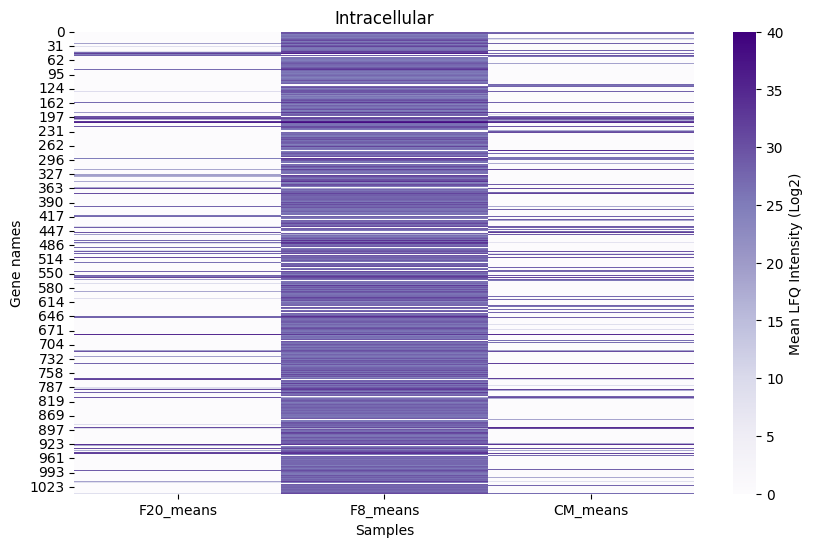

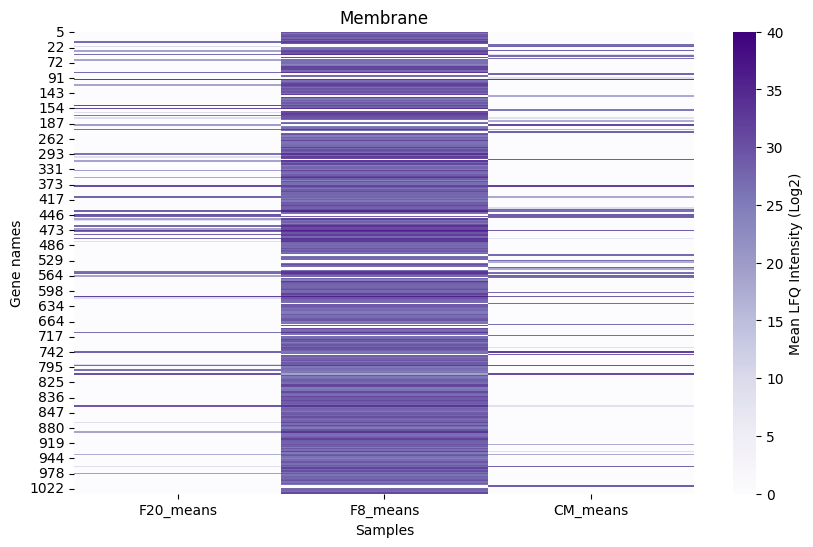

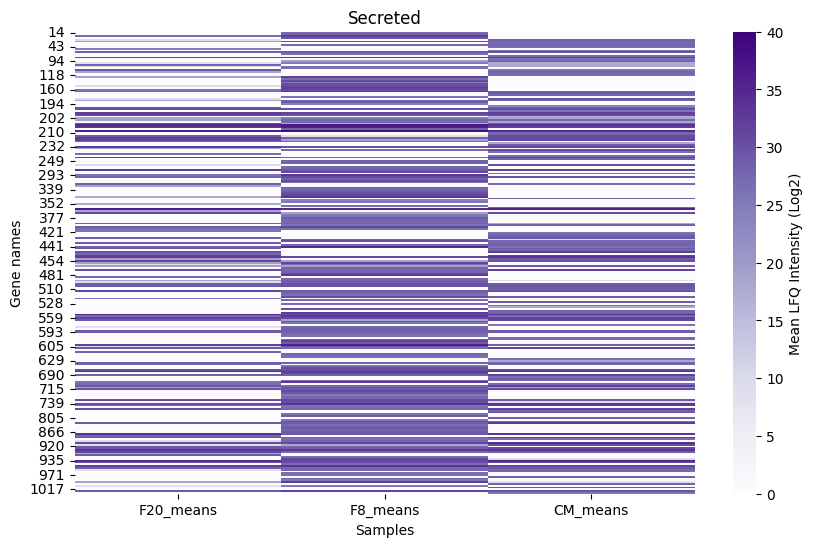

In [5]:
# Define a function to create heatmaps
def create_heatmap(data, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data, cmap='Purples', cbar_kws={'label': 'Mean LFQ Intensity (Log2)'}, vmin=0, vmax=40)  # Adjust vmin and vmax if needed
    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Gene names')
    plt.show()

# Filter dataframes for IC, M, and S localizations
IC_df = MS2[MS2['Metadata'].str.contains("IC")]
M_df = MS2[MS2['Metadata'].str.contains("M")]
S_df = MS2[MS2['Metadata'].str.contains("S")]

# Create heatmaps
create_heatmap(IC_df[['F20_means', 'F8_means', 'CM_means']], 'Intracellular')
create_heatmap(M_df[['F20_means', 'F8_means', 'CM_means']], 'Membrane')
create_heatmap(S_df[['F20_means', 'F8_means', 'CM_means']], 'Secreted')
